<a href="https://colab.research.google.com/github/alimoorreza/CS195-Fall24-Notebook-1/blob/main/notebook1_histogram_equalization_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
img_pil = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/assignment1/input_images/himalaya_dark.jpg')
img_pil_array = np.asarray(img_pil)

plt.figure(figsize=(4,4)) #figure size (4 inch, 4 inch)
plt.imshow(img_pil_array, cmap='gray')
plt.title('Himalayas Dark')
img_pil_array.shape

# **Calculating Histogram Equalization**

Text(0, 0.5, 'number of pixels')

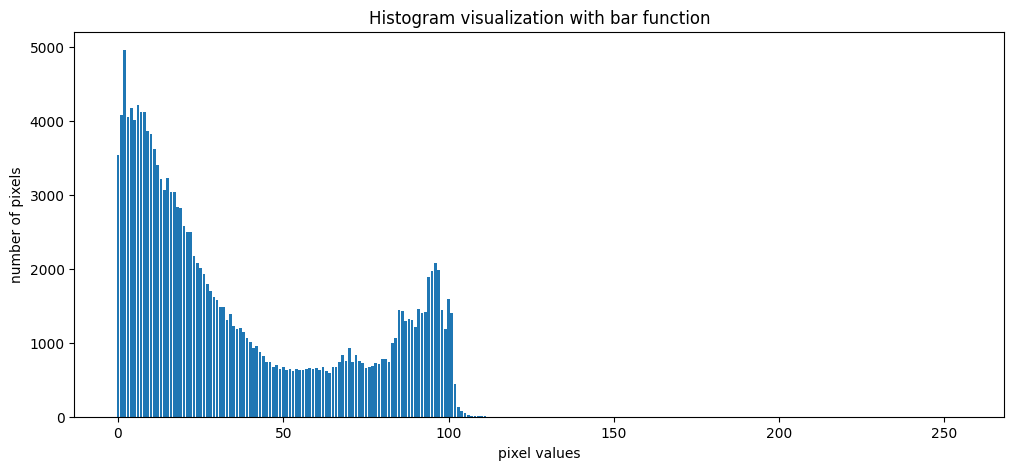

In [ ]:
# alternate way of visualizing the histogram where we have more control

# Use histogram() function from Pillow's Image module
# this function returns the histogram, hence you have access to the bins, you can compute normalized histogram


# Step 1: generate the histogram (HINT: utilize Image.histogram() function from PIL)
# YOUR CODE
# ...
# ...
# ...


# optionally, you can also display the histogram
# YOUR CODE
# ...
# ...
# ...

In [ ]:
# Step 2: normalize the histogram so that sum of the new histogram is 255
# use the equation as shown in the readme file
img_hist_norm = np.zeros(256)

# YOUR CODE
# ...
# ...
# ...


<BarContainer object of 256 artists>

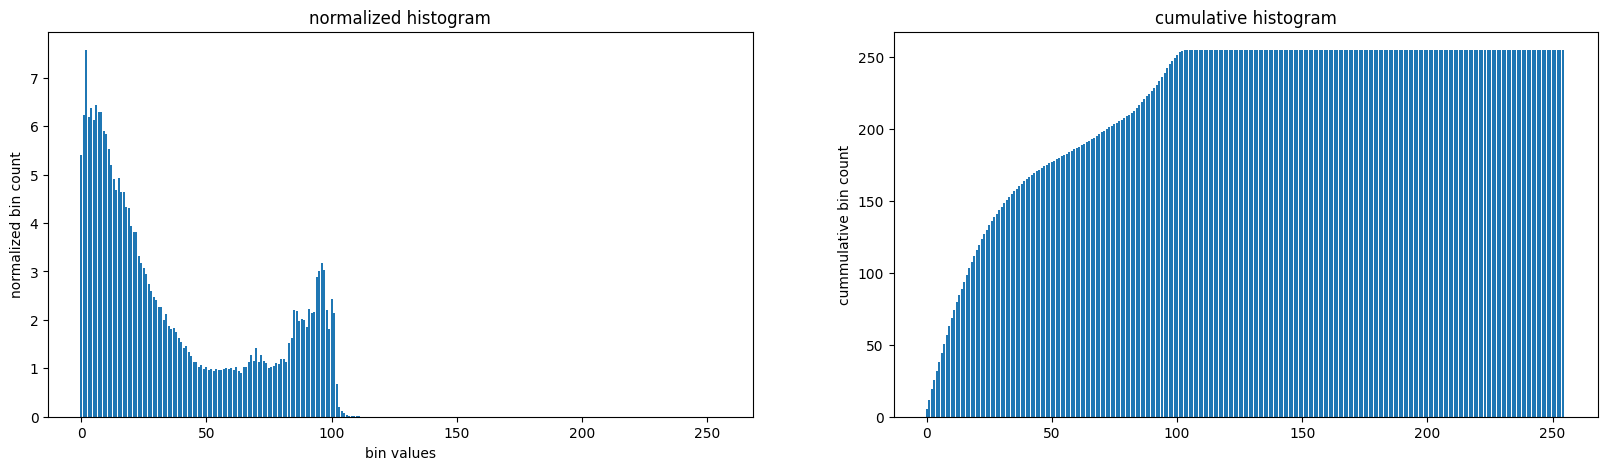

In [ ]:
# Step 3: compute the cumulative sum of the newly created normalized histogram

# make a deep copy and then calculate the cumulative sum
img_hist_cum = np.zeros(256)

# YOUR CODE
# ...
# ...
# ...


fig, axes = plt.subplots(1,2, figsize=(20, 5))
ax = axes[0]
ax.set_xlabel('bin values')
ax.set_ylabel('normalized bin count')
ax.set_title('normalized histogram')
bins = np.arange(len(img_hist_norm))
ax.bar(bins, img_hist_norm)

ax = axes[1]
ax.set_label('bin values')
ax.set_ylabel('cummulative bin count')
ax.set_title('cumulative histogram')
ax.bar(bins, img_hist_cum)

Text(0.5, 1.0, 'Histogram normalized image')

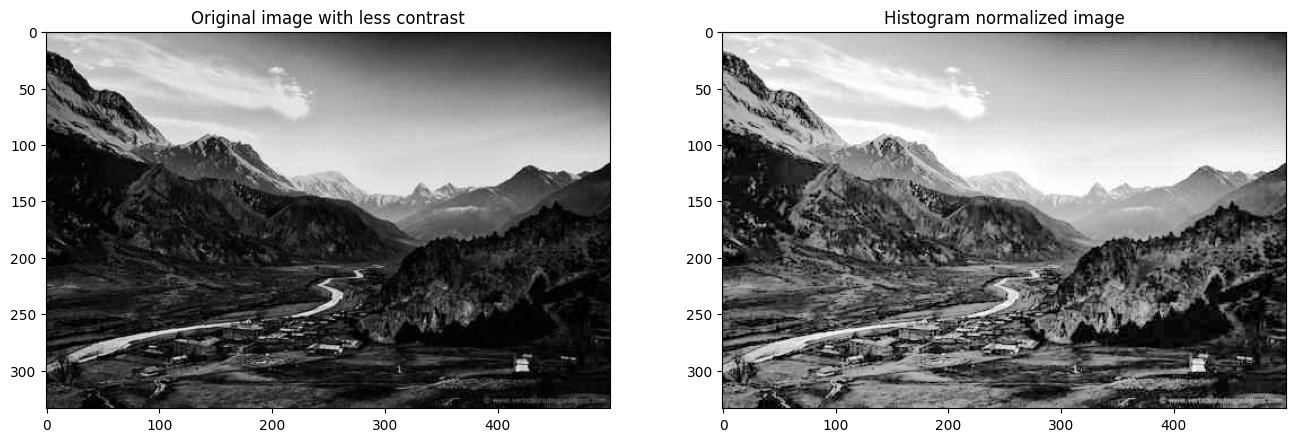

In [ ]:
# Step 4: Use the cumulative histogram as a lookup table to transform the value of each pixel location
# I've provided the code snippet (see below). You do not need to write code for this step.
# If you correctly implement steps 1, 2, and 3, your code should brighten the darker regions of the image.

from PIL import Image
new_img = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/assignment1/input_images/himalaya_dark.jpg')
new_img_array = np.array(new_img)
rows = new_img_array.shape[0]
cols = new_img_array.shape[1]

for y in range(rows):
  for x in range(cols):
    old_pixel_value = new_img.getpixel((x, y))
    new_pixel_value = img_hist_cum[old_pixel_value]
    new_img.putpixel((x, y), round(new_pixel_value))

fig, axes = plt.subplots(1,2, figsize=(16, 16))
ax = axes[0]
ax.imshow(img_pil_array, cmap='gray')
ax.set_title('Original image with less contrast')
ax = axes[1]
ax.imshow(new_img, cmap='gray')
ax.set_title('Histogram normalized image')
